In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Loading Dataset MNIST**

In [39]:
from keras.datasets import mnist

(X_train , y_train ) , (X_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [40]:
len(X_train) , len(y_train ) , len(X_test) , len(y_test)

(60000, 60000, 10000, 10000)

In [41]:
X_train.shape

(60000, 28, 28)

In [42]:
y_train.shape

(60000,)

In [46]:
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         54, 227, 253, 252, 239, 233, 252,  57,   6,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  10,  60,
        224, 252, 253, 252, 202,  84, 252, 253, 122,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 163, 252,
        252, 252, 253, 252, 252,  96, 189, 253, 167,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 238, 253,
        253, 190, 114, 253, 228,  47,  79, 255, 168,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238, 252, 252,
        179,  12,  75, 121,  21,   0,   0, 253, 243,  50,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  38, 165, 253, 233, 208,
         84,   0,   0,   0,   0,   0,   0, 253, 252, 165,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   7, 178, 252, 240,  71,  19,
         28,   0,   0,   0,   0,   0,   0, 253, 252, 195,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  57, 252, 252,  63,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 253, 252, 195,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 198, 253, 190,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 255, 253, 196,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  76, 246, 252, 112,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 253, 252, 148,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 230,  25,   0,   0,   0,
          0,   0,   0,   0,   0,   7, 135, 253, 186,  12,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 223,   0,   0,   0,   0,
          0,   0,   0,   0,   7, 131, 252, 225,  71,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 145,   0,   0,   0,   0,
          0,   0,   0,  48, 165, 252, 173,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  86, 253, 225,   0,   0,   0,   0,
          0,   0, 114, 238, 253, 162,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 249, 146,  48,  29,  85,
        178, 225, 253, 223, 167,  56,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 252, 252, 229, 215, 252,
        252, 252, 196, 130,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  28, 199, 252, 252, 253, 252, 252,
        233, 145,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  25, 128, 252, 253, 252, 141,
         37,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [47]:
y_train[1]

0

In [52]:
def plot_digit(X_train , y_train , index):
  plt.figure(figsize=(2,2))
  plt.imshow(X_train[index])
  plt.xlabel(y_train[index])

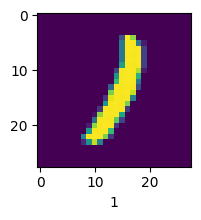

In [56]:
plot_digit(X_train , y_train , 78)

In [60]:
X_train = X_train / 255
X_test = X_test / 255

**ANN**

In [85]:
from keras import models , layers , Sequential

ann = Sequential([
    # Dense
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(500,activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(400,activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(200,activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(100,activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10,activation="softmax")
])


ann.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [86]:
ann.fit(X_train , y_train , epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.4697 - loss: 1.4356
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8678 - loss: 0.4640
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9012 - loss: 0.3603
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9145 - loss: 0.3140
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9270 - loss: 0.2734
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9334 - loss: 0.2517
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9330 - loss: 0.2435
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9389 - loss: 0.2289
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9417 - loss: 0.2177
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9443 - loss: 0.2032


In [65]:
ann.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9727 - loss: 0.1025


[0.08670417219400406, 0.9772999882698059]

In [87]:
y_pred_ann = ann.predict(X_test)
y_pred_ann = [np.argmax(ele) for ele in y_pred_ann]


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [88]:
y_pred_ann[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [89]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

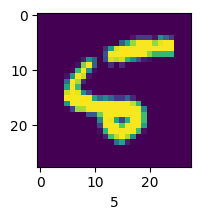

In [91]:
plot_digit(X_test,y_test,8)

In [92]:
from sklearn.metrics import confusion_matrix , classification_report

cm = confusion_matrix(y_test,y_pred_ann)
cm

array([[ 971,    0,    1,    0,    0,    2,    3,    1,    2,    0],
       [   0, 1121,    4,    1,    0,    1,    3,    1,    4,    0],
       [   7,    0, 1005,    0,    4,    0,    4,    7,    5,    0],
       [   1,    2,   23,  955,    0,   11,    0,   11,    5,    2],
       [   1,    1,    2,    0,  954,    0,   14,    2,    2,    6],
       [  12,    1,    0,    9,    1,  842,   12,    1,    9,    5],
       [   8,    3,    0,    0,    3,    4,  939,    0,    1,    0],
       [   2,    6,   14,    2,    2,    0,    0,  996,    1,    5],
       [   7,    2,    7,    8,    5,    5,   10,    4,  924,    2],
       [  10,    6,    0,    6,   29,    6,    1,   12,    8,  931]])

Text(50.722222222222214, 0.5, 'Truth')

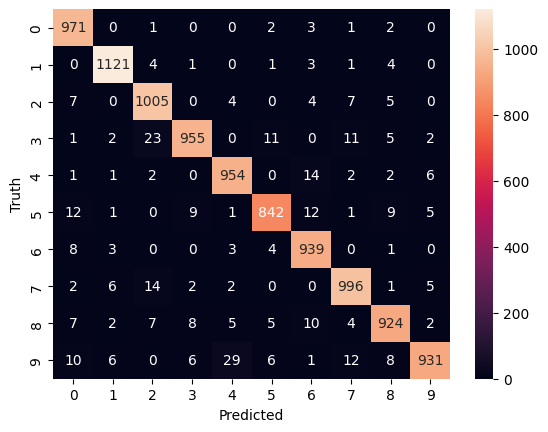

In [93]:
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [94]:
### Precision of class 0
(971)/(971+7+1+1+12+8+2+7+10)

0.9528949950932286

In [96]:
### Recall for class 0
(971)/(971+1+2+3+1+2)

0.9908163265306122

In [97]:
#### F1 score for class 0
(2*0.9528949950932286*0.9908163265306122)/(0.9528949950932286+0.9908)

0.971493903098097

In [98]:
np.average([.97,.98,.96,.96,.96,.96,.97,.97,.96,.95])

0.9640000000000001

In [95]:
print("Classification Report \n",classification_report(y_test,y_pred_ann))

Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.95      0.97      0.96      1032
           3       0.97      0.95      0.96      1010
           4       0.96      0.97      0.96       982
           5       0.97      0.94      0.96       892
           6       0.95      0.98      0.97       958
           7       0.96      0.97      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.98      0.92      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



**CNN**

In [77]:
from keras import models , layers , Sequential

cnn = Sequential([
    # CNN
    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=16,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    # Dense
    layers.Flatten(),
    layers.Dense(200,activation="relu"),
    # layers.Dropout(0.5)
    layers.Dense(10,activation="softmax")
])


cnn.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [78]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6004 - loss: 1.1903
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9169 - loss: 0.2736
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9418 - loss: 0.1895
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9561 - loss: 0.1411
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9630 - loss: 0.1189
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9672 - loss: 0.1050
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9717 - loss: 0.0920
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9739 - loss: 0.0828
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9773 - loss: 0.0737
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9797 - loss: 0.0657


In [79]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9726 - loss: 0.0825


[0.07073558866977692, 0.9760000109672546]

In [80]:
y_pred_cnn = cnn.predict(X_test)
y_pred_cnn = [np.argmax(ele) for ele in y_pred_cnn]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [81]:
y_pred_cnn[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [82]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

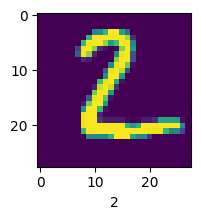

In [84]:
plot_digit(X_test,y_test,1)